<a href="https://colab.research.google.com/github/hadiSahin/introduction-to-machine-learning/blob/main/Homeworks/hw3_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3**

Generate dataset using make_classification function in the sklearn.datasets class. 

Generate 10000 samples 

with 8 features (X) with one label (y). 

n_informative = 5

class_sep = 2

random_state = 42



Explore and analyse raw data.

Do preprocessing for classification.

Split your dataset into train and test test (0.7 for train and 0.3 for test).

Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)

Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [80]:
import pandas as pd
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=17,n_classes=3)
X = pd.DataFrame(X)
X.columns=['a','b','c','d','e','f','g','h']
y = pd.Series(y)

In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   e       10000 non-null  float64
 5   f       10000 non-null  float64
 6   g       10000 non-null  float64
 7   h       10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [82]:
X.describe()

,a,b,c,d,e,f,g,h
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.668567,0.443251,-0.441706,0.003928,-0.011575,-0.002974,-0.656571,-0.001312
std,2.348207,3.870422,3.481258,2.359503,1.005898,2.355683,2.366466,2.445677
min,-7.124358,-11.030050,-10.025129,-7.723732,-4.118506,-6.480167,-7.386244,-8.073056
25%,-2.459174,-2.609749,-3.162365,-1.974666,-0.686051,-2.021925,-2.409591,-2.022405
50%,-1.103610,-0.412564,-1.449104,0.139899,-0.014280,-0.044380,-1.116989,0.089930
75%,1.215146,3.725468,2.606583,1.993472,0.682881,2.011592,1.193605,2.022852
max,6.506660,11.844298,10.626584,6.445305,3.925805,6.786136,7.593909,6.700179


In [83]:
y.value_counts()
#the data is pretty balanced

1    3335
0    3333
2    3332
dtype: int64

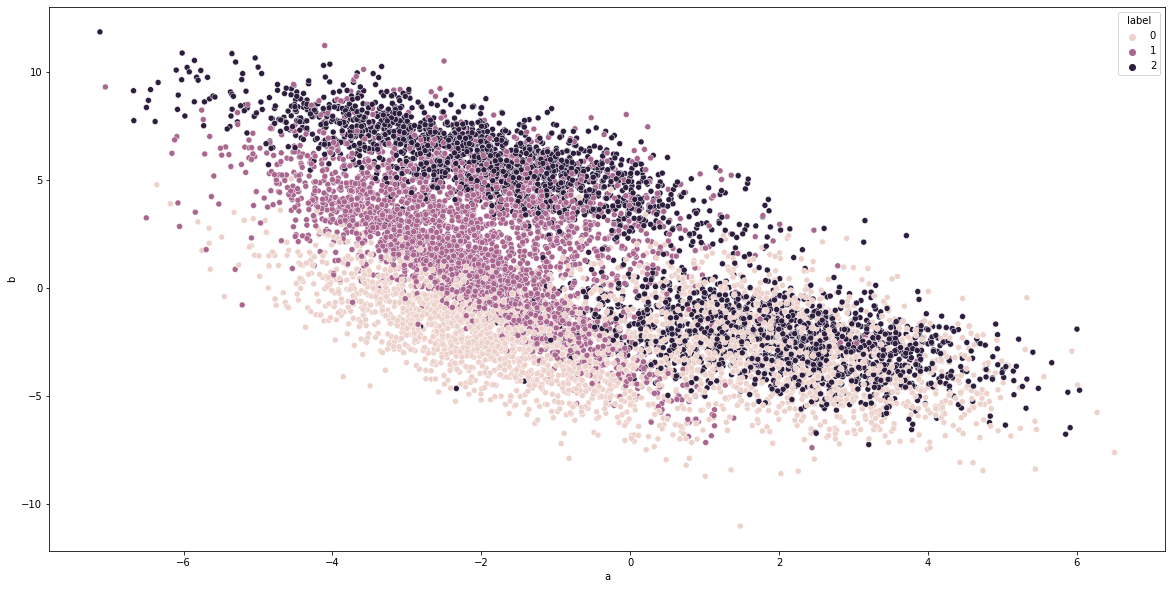

In [84]:
data=X
data['label']=y
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="a", y="b", hue="label", data=data)


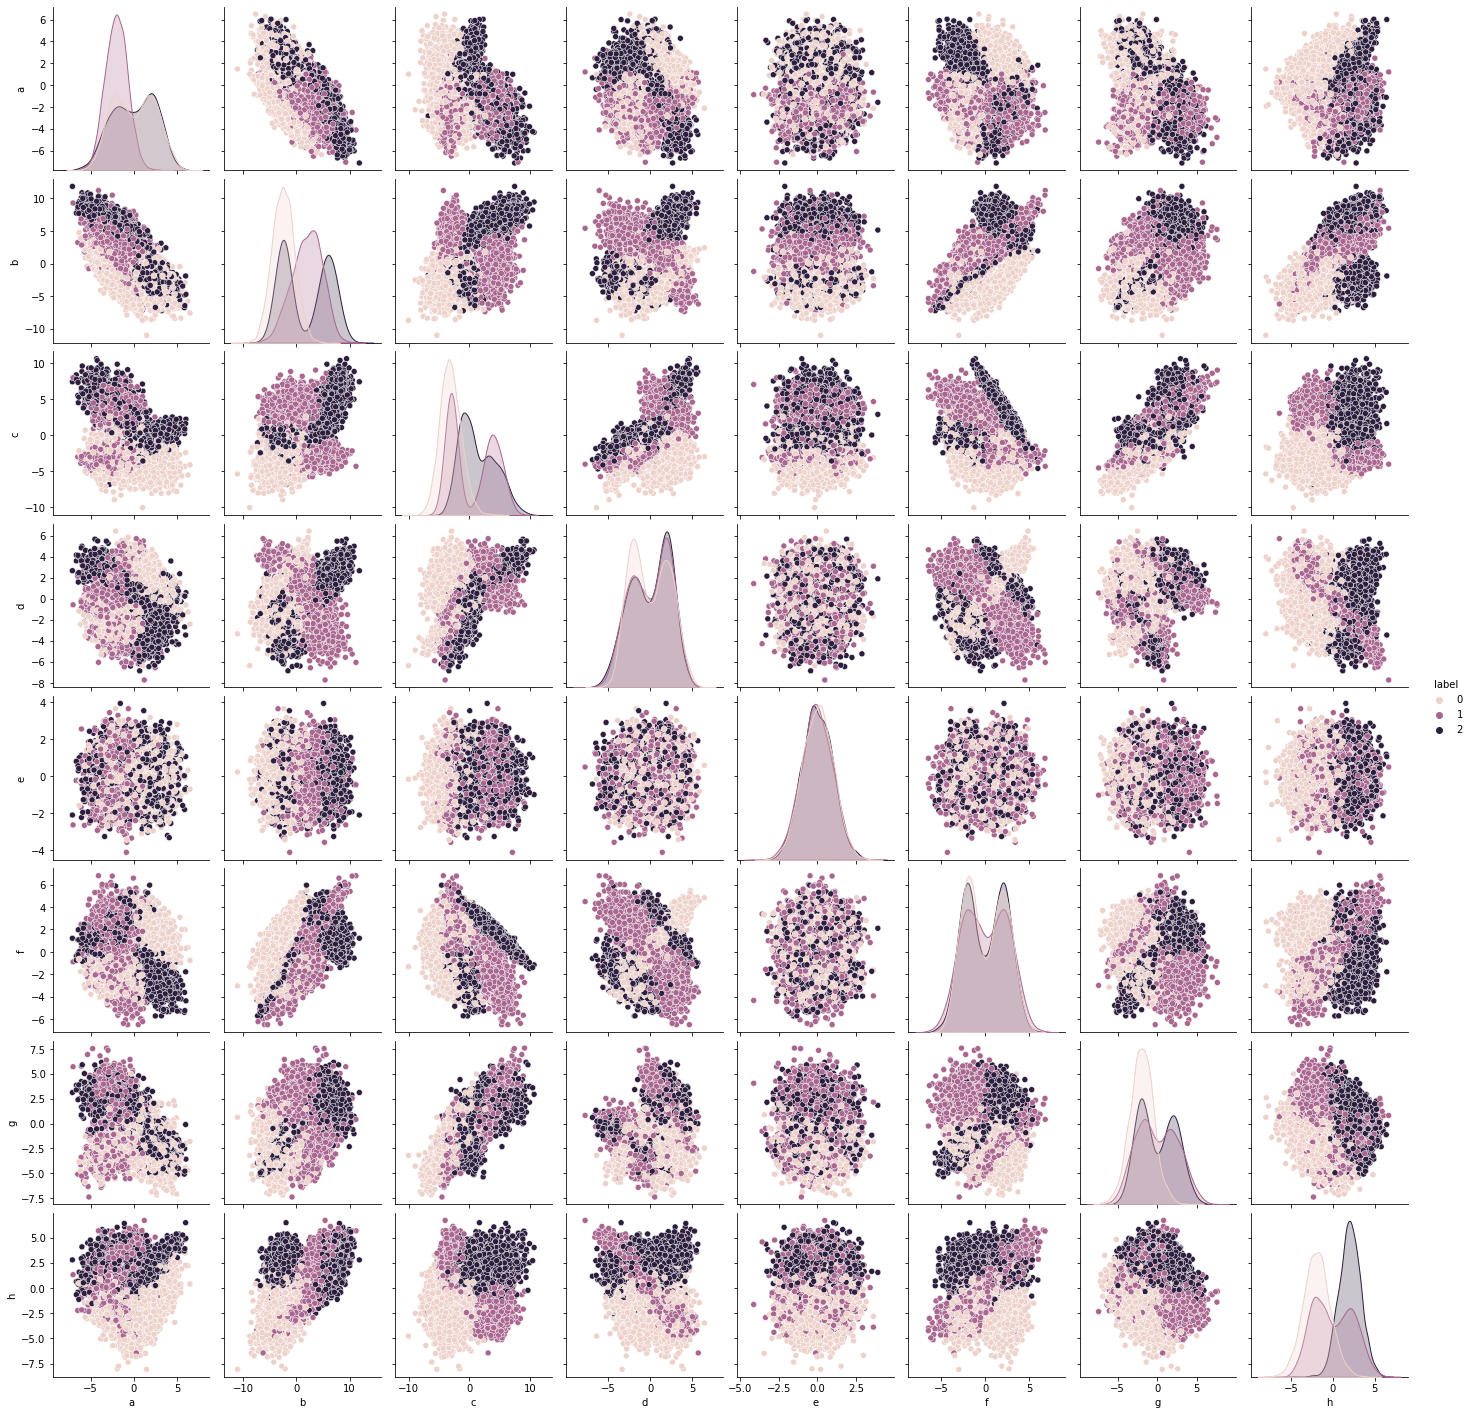

In [85]:
sns.pairplot(data, hue="label")

In [86]:
#My data is already saparated as X and y and I do not have unnecassary column. 
#I do not need it as decision tree does not require sclaing. In any case I'll scale X
from sklearn import preprocessing
X_s = preprocessing.scale(X)
X_s = pd.DataFrame(X_s)
X_s.head()
y

0       1
1       1
2       2
3       0
4       2
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Length: 10000, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=17)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

#accuracy 1.0 uzerinde oldugu icin overfitting olabilir diye dusundum. max depthi degistirsem de farkli bir sonuc almadim.

Accuracy of train: 1.0
Accuracy of test: 1.0


In [89]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1101
           1       1.00      1.00      1.00      1117
           2       1.00      1.00      1.00      1082

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [90]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(2,6,2),
    'min_child_weight':range(1,3,1),
    'learning_rate': [0.00001,0.001,0.01,0.1,1],
    'n_estimators': [4,6,8]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=8, max_depth=6,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=17)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)


In [91]:
print("Tuned: {}".format(clf.best_params_)) 
print("Mean cv {:.6f}".format(clf.best_score_))
print("Train accuracy {:.6f}".format(clf.score(X_train,y_train)))
print("Test accuracy {:.6f}".format(clf.score(X_test,y_test)))

Tuned: {'learning_rate': 1e-05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 4}
Mean cv 1.000000
Train accuracy 1.000000
Test accuracy 1.000000


Overfitting problemi var diye dusunuyorum. bu decision treelerde gorebilecegimiz bir durum. max_depth ve diger parametreleri degistirince de farklilik goremedim.
Verinin olusturuldugu sekilden de olabilir. class_sep daha dusuk tutularak klasifikasyonu daha zor olan bir veri kullanilabilir.